In [1]:
import json
import numpy as np
from termcolor import cprint
from evalplus.eval import (
    FAIL,
    PASS,
    compatible_eval_result,
    estimate_pass_at_k,
    untrusted_check,
)
def eval_pass_at_k(results, base_only=False, dataset = "mbpp"):
    # Calculate pass@k.
    total = np.array([len(r) for r in results["eval"].values()])
    base_correct = []
    new_correct = []
    final_pass_at_k = {}

    for res in results["eval"].values():
        bc = sum([r["base_status"] == PASS for r in res])
        base_correct.append(bc)
        if not base_only:
            new_correct.append(
                sum(
                    [
                        res[i]["base_status"] == res[i]["plus_status"] == PASS
                        for i in range(len(res))
                    ]
                )
            )
    base_correct = np.array(base_correct)

    pass_at_k = {
        f"pass@{k}": estimate_pass_at_k(total, base_correct, k).mean()
        for k in [1, 5, 10, 20, 25, 50, 75, 100, 150, 200]
        if total.min() >= k
    }
    cprint(f"{dataset} (base tests)", "red")
    for k, v in pass_at_k.items():
        cprint(f"{k}:\t{v:.6f}", "red")
        pass
    final_pass_at_k["base"] = pass_at_k
    
    if new_correct:
        cprint(f"{dataset}+ (base + extra tests)", "green")
        pass
        pass_at_k = {
            f"pass@{k}": estimate_pass_at_k(total, np.array(new_correct), k).mean()
            for k in [1, 5, 10, 20, 25, 50, 75, 100, 150, 200]
            if (total >= k).all()
        }
        for k, v in pass_at_k.items():
            cprint(f"{k}:\t{v:.6f}", "green")
            pass
    final_pass_at_k["plus"] = pass_at_k
    return final_pass_at_k["base"], final_pass_at_k["plus"]



In [8]:
work_dir = "/mnt/scratch-artemis/haausing/code_reranking/evalplus_outputs"
dataset_dir = "mbpp"
#gen_dir = "deepseek-coder-33b-instruct_temp_0.8"
#gen_dir = "deepseek-coder-7b-instruct-v1.5_temp_0"
#gen_dir = "deepseek-coder-6.7b-instruct_temp_1.2" #+ "_debug1_sd-ut"
#gen_dir = "code-llama-7b-instruct_temp_1.6" #+ "_debug1_sd-ut"
#gen_dir = "deepseek-coder-6.7b-instruct_temp_0" #+ "_debug1_sd-ut"
gen_dir = "code-llama-13b-instruct_temp_0" #+ "_debug1_sd-ut"
#_debug1_not_change_positive
# load exec_outputs

# load eval_results
with open(f"{work_dir}/{dataset_dir}/{gen_dir}/eval_results.json", "r") as f:
    eval_results = json.load(f)
#for task_id in eval_results["eval"]:
#    eval_results["eval"][task_id] = sorted(eval_results["eval"][task_id], key=lambda x: int(x["solution_id"]))

#pop out ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]
if dataset_dir == "mbpp":
    for task_id in ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]:
        if task_id in eval_results["eval"]:
            eval_results["eval"].pop(task_id)

cprint(f"{gen_dir}", "light_blue")
base_pass_at_k, plus_pass_at_k = eval_pass_at_k(eval_results, base_only=False, dataset=dataset_dir)


code-llama-13b-instruct_temp_0
mbpp (base tests)
pass@1:	0.625316
mbpp+ (base + extra tests)
pass@1:	0.526582


In [42]:
print(list(base_pass_at_k.values())[1:6])
print(list(plus_pass_at_k.values())[1:6])
#print(list(base_pass_at_k.values())[0])
#print(list(plus_pass_at_k.values())[0])
#print(plus_pass_at_k)


[0.7418447333798297, 0.7765505380388282, 0.8003869722008987, 0.8061304659090817, 0.8197550447131277]
[0.6247839162508844, 0.6551937283262915, 0.6788429768257987, 0.6854617924216866, 0.7037075195516918]


In [5]:
print(list(base_pass_at_k.values())[1:6])
print(list(plus_pass_at_k.values())[1:6])



[np.float64(0.6008757634912606), np.float64(0.6795546104023205), np.float64(0.74025163190667), np.float64(0.7567134711382415), np.float64(0.7999631398911994)]
[np.float64(0.5161356168800573), np.float64(0.5843081249178235), np.float64(0.6385649250167906), np.float64(0.6539194714481712), np.float64(0.6956510803915198)]


In [5]:
work_dir = "/mnt/scratch-artemis/haausing/code_reranking/evalplus_outputs/mbpp"
gen_dir = "deepseek-coder-7b-instruct-v1.5_temp_0.8"

# load eval_results
with open(f"{work_dir}/{gen_dir}/eval_results.json", "r") as f:
    eval_results = json.load(f)
for task_id in eval_results["eval"]:
    eval_results["eval"][task_id] = sorted(eval_results["eval"][task_id], key=lambda x: int(x["solution_id"]))

#pop out ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]
for task_id in ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]:
    eval_results["eval"].pop(task_id)

cprint(f"{gen_dir}", "light_blue")
base_pass_at_k, plus_pass_at_k = eval_pass_at_k(eval_results, base_only=False, dataset="mbpp")


deepseek-coder-7b-instruct-v1.5_temp_0.8
mbpp (base tests)
pass@1:	0.714810
pass@5:	0.836459
pass@10:	0.867911
pass@20:	0.891345
pass@25:	0.897480
pass@50:	0.912314
pass@75:	0.918165
pass@100:	0.921450
pass@150:	0.925743
pass@200:	0.929114
mbpp+ (base + extra tests)
pass@1:	0.617747
pass@5:	0.749225
pass@10:	0.782521
pass@20:	0.807712
pass@25:	0.814421
pass@50:	0.830792
pass@75:	0.837361
pass@100:	0.841193
pass@150:	0.846482
pass@200:	0.850633


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import json

# Assuming `pass_at_k` is a dictionary returned from the `eval_pass_at_k` function
# For example:
# pass_at_k = {'pass@1': 0.95, 'pass@5': 0.85, 'pass@10': 0.80, 'pass@50': 0.60, 'pass@100': 0.50}

# Convert the dictionary to a DataFrame for easier plotting
base_model = "code-llama-7b-instruct_temp_1.6"

work_dir = "/mnt/scratch-artemis/haausing/code_reranking/evalplus_outputs/humaneval"
gen_dirs = [
    base_model,
    f"{base_model}_debug1_sd-ut",
    f"{base_model}_debug2_sd-ut",
    f"{base_model}_debug3_sd-ut"
]
map_gen_dir_to_label = {
    base_model: "original",
    f"{base_model}_debug1_sd-ut": "1 round SD-UT",
    f"{base_model}_debug2_sd-ut": "2 rounds SD-UT",
    f"{base_model}_debug3_sd-ut": "3 rounds SD-UT"
}

plt.figure(figsize=(10, 6))

base_pass_at_k = {}
plus_pass_at_k = {}
data = {}

for gen_dir in tqdm(gen_dirs):
    # load eval_results
    with open(f"{work_dir}/{gen_dir}/eval_results.json", "r") as f:
        eval_results = json.load(f)
    for task_id in eval_results["eval"]:
        eval_results["eval"][task_id] = sorted(eval_results["eval"][task_id], key=lambda x: int(x["solution_id"]))

    #pop out ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]
    for task_id in ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]:
        if task_id in eval_results["eval"]:
            eval_results["eval"].pop(task_id)
    base_pass_at_k[map_gen_dir_to_label[gen_dir]], plus_pass_at_k[map_gen_dir_to_label[gen_dir]] = eval_pass_at_k(eval_results, base_only=False, dataset="mbpp")
    data[map_gen_dir_to_label[gen_dir]] = {
        "k": [int(k.split('@')[1]) for k in base_pass_at_k[map_gen_dir_to_label[gen_dir]].keys()],
        "pass@k": [v for v in base_pass_at_k[map_gen_dir_to_label[gen_dir]].values()]
    }
    data[map_gen_dir_to_label[gen_dir] + "+"] = {
        "k": [int(k.split('@')[1]) for k in plus_pass_at_k[map_gen_dir_to_label[gen_dir]].keys()],
        "pass@k": [v for v in plus_pass_at_k[map_gen_dir_to_label[gen_dir]].values()]
    }
df = pd.DataFrame(data)


 25%|██▌       | 1/4 [00:20<01:01, 20.49s/it]

mbpp (base tests)
pass@1:	0.341311
pass@5:	0.586415
pass@10:	0.672147
pass@20:	0.745857
pass@25:	0.766969
pass@50:	0.823828
pass@75:	0.850920
pass@100:	0.867358
pass@150:	0.886271
pass@200:	0.896341
mbpp+ (base + extra tests)
pass@1:	0.302043
pass@5:	0.528195
pass@10:	0.612348
pass@20:	0.684540
pass@25:	0.705160
pass@50:	0.761755
pass@75:	0.790063
pass@100:	0.807471
pass@150:	0.826567
pass@200:	0.835366


 50%|█████     | 2/4 [00:53<00:55, 27.64s/it]

mbpp (base tests)
pass@1:	0.393872
pass@5:	0.617838
pass@10:	0.700470
pass@20:	0.773768
pass@25:	0.794328
pass@50:	0.847737
pass@75:	0.872137
pass@100:	0.886806
pass@150:	0.904096
pass@200:	0.914634
mbpp+ (base + extra tests)
pass@1:	0.347409
pass@5:	0.559648
pass@10:	0.640243
pass@20:	0.710875
pass@25:	0.730708
pass@50:	0.783608
pass@75:	0.808692
pass@100:	0.823457
pass@150:	0.839459
pass@200:	0.847561


 75%|███████▌  | 3/4 [01:15<00:25, 25.45s/it]

mbpp (base tests)
pass@1:	0.398232
pass@5:	0.621515
pass@10:	0.704834
pass@20:	0.778818
pass@25:	0.799572
pass@50:	0.853281
pass@75:	0.877248
pass@100:	0.891153
pass@150:	0.906571
pass@200:	0.914634
mbpp+ (base + extra tests)
pass@1:	0.351037
pass@5:	0.562189
pass@10:	0.642629
pass@20:	0.712651
pass@25:	0.732262
pass@50:	0.784801
pass@75:	0.810008
pass@100:	0.824907
pass@150:	0.840604
pass@200:	0.847561


100%|██████████| 4/4 [01:38<00:00, 24.71s/it]

mbpp (base tests)
pass@1:	0.398415
pass@5:	0.621560
pass@10:	0.704887
pass@20:	0.778861
pass@25:	0.799616
pass@50:	0.853333
pass@75:	0.877279
pass@100:	0.891164
pass@150:	0.906571
pass@200:	0.914634
mbpp+ (base + extra tests)
pass@1:	0.351128
pass@5:	0.562041
pass@10:	0.642231
pass@20:	0.711759
pass@25:	0.731166
pass@50:	0.783001
pass@75:	0.807838
pass@100:	0.822691
pass@150:	0.839174
pass@200:	0.847561


<Figure size 1000x600 with 0 Axes>

1 round SD-UT
2 rounds SD-UT
3 rounds SD-UT


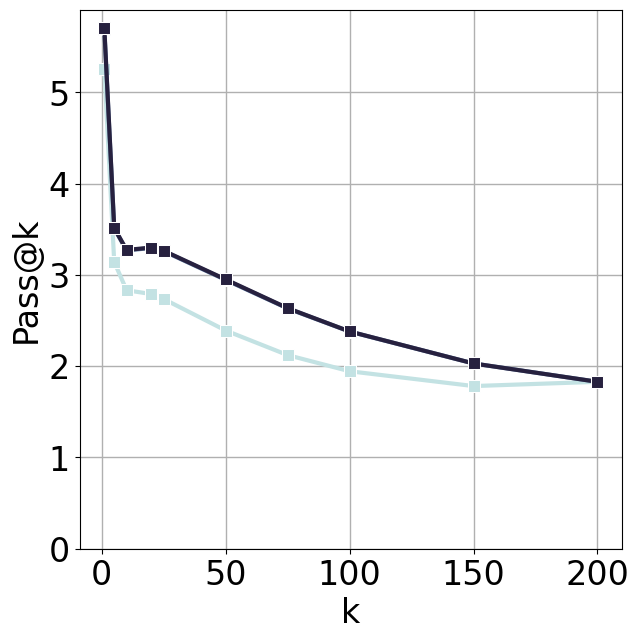

In [4]:
# Plotting
name_dict = {'original': 'No SD',
 'original+': 'No SD',
 '1 round SD-UT': '1 round SD',
 '1 round SD-UT+': '1 round SD',
 '2 rounds SD-UT': '2 rounds SD',
 '2 rounds SD-UT+': '2 rounds SD',
 '3 rounds SD-UT': '3 rounds SD',
 '3 rounds SD-UT+': '3 rounds SD'}
plt.figure(figsize=(7, 7))
palette = sns.color_palette("ch:start=.2,rot=-.3", 9)  # Define a palette with 3 colors
palette_dashed = sns.color_palette("dark:salmon_r", 9)  # Define a palette with 2 colors for dashed lines
color_list = [palette[0],
              palette_dashed[0],
              palette[0],
              palette_dashed[0],
              palette[4],
              palette_dashed[3],
              palette[8],
              palette_dashed[6]]

line_width = 3
marker_size = 8
for i,column in enumerate(df.columns):
    # if i is odd number, continue
    if i % 2 != 0:
        continue
    if i == 0:
        continue
    print(column)
    sns.lineplot(x=df[column]["k"], y=[100* (e - df["original"]["pass@k"][idx]) for idx,e in enumerate(df[column]["pass@k"])], 
                 marker='s', 
                 markersize=marker_size,
                 #label=name_dict[column], 
                 color=color_list[i]
                 , linewidth=line_width)

plt.xlabel('k', fontsize=24)
plt.ylabel('Pass@k', fontsize=24)
#plt.legend(
#    fontsize=18,
#    #title='methods', 
#    #title_fontsize='16',
#    shadow=False, 
#    fancybox=True, 
#    loc='lower right', 
#    framealpha=0.3,
#    #bbox_to_anchor=(1.05, 1) 
#)
plt.grid(True, linestyle='-', linewidth=1, alpha=1)
plt.xticks(
    ticks=np.arange(0, 250, 50), 
    fontsize=24)
plt.yticks(
    ticks=np.arange(0, 6, 1), 
    fontsize=24)
plt.savefig('../figs/humaneval_pass_at_k_performance_base.jpg', dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()

In [52]:
# print(data["original+"]["pass@k"][1:6])
# print(data["original"]["pass@k"][1:6])
# print(data["original+"]["k"][1:6])
# print(data["original+"]["pass@k"][0])
# print(data["original"]["pass@k"][0])
# print(data["original+"]["k"][0])

# print(data["1 round SD-UT+"]["pass@k"][1:6])
# print(data["1 round SD-UT"]["pass@k"][1:6])
# print(data["1 round SD-UT+"]["k"][1:6])
# print(data["1 round SD-UT"]["pass@k"][0])
# print(data["1 round SD-UT+"]["pass@k"][0])
# print(data["1 round SD-UT"]["k"][0])


[0.549874585938673, 0.5826676421726437, 0.6066776519474328, 0.6127367484567747, 0.628783076797045]
[0.654681591558583, 0.6902426012648786, 0.7166078365749753, 0.723261617044594, 0.7395197979175396]
[5, 10, 20, 25, 50]
0.4487848101265823
0.5418481012658228
1
[0.584067391080893, 0.6158672798249673, 0.6387025340624729, 0.6444274118721207, 0.6597830043534535]
[0.7035898895904201, 0.7358490144865523, 0.7580756025524973, 0.7634787322976426, 0.7762781913654135]
[5, 10, 20, 25, 50]
0.5943291139240506
0.4854556962025317
1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import json

# Assuming `pass_at_k` is a dictionary returned from the `eval_pass_at_k` function
# For example:
# pass_at_k = {'pass@1': 0.95, 'pass@5': 0.85, 'pass@10': 0.80, 'pass@50': 0.60, 'pass@100': 0.50}

# Convert the dictionary to a DataFrame for easier plotting
base_model = "code-llama-7b-instruct_temp_1.6"

work_dir = "/mnt/scratch-artemis/haausing/code_reranking/evalplus_outputs/mbpp"
gen_dirs = [
    base_model,
    f"{base_model}_debug1_sd-ut",
    f"{base_model}_debug2_sd-ut",
    f"{base_model}_debug3_sd-ut"
]
map_gen_dir_to_label = {
    base_model: "original",
    f"{base_model}_debug1_sd-ut": "1 round SD-UT",
    f"{base_model}_debug2_sd-ut": "2 rounds SD-UT",
    f"{base_model}_debug3_sd-ut": "3 rounds SD-UT"
}

plt.figure(figsize=(10, 6))

base_pass_at_k = {}
plus_pass_at_k = {}
data = {}

for gen_dir in tqdm(gen_dirs):
    # load eval_results
    with open(f"{work_dir}/{gen_dir}/eval_results.json", "r") as f:
        eval_results = json.load(f)
    for task_id in eval_results["eval"]:
        eval_results["eval"][task_id] = sorted(eval_results["eval"][task_id], key=lambda x: int(x["solution_id"]))

    #pop out ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]
    for task_id in ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]:
        if task_id in eval_results["eval"]:
            eval_results["eval"].pop(task_id)
    base_pass_at_k[map_gen_dir_to_label[gen_dir]], plus_pass_at_k[map_gen_dir_to_label[gen_dir]] = eval_pass_at_k(eval_results, base_only=False, dataset="mbpp")
    data[map_gen_dir_to_label[gen_dir]] = {
        "k": [int(k.split('@')[1]) for k in base_pass_at_k[map_gen_dir_to_label[gen_dir]].keys()],
        "pass@k": [v for v in base_pass_at_k[map_gen_dir_to_label[gen_dir]].values()]
    }
    data[map_gen_dir_to_label[gen_dir] + "+"] = {
        "k": [int(k.split('@')[1]) for k in plus_pass_at_k[map_gen_dir_to_label[gen_dir]].keys()],
        "pass@k": [v for v in plus_pass_at_k[map_gen_dir_to_label[gen_dir]].values()]
    }
df = pd.DataFrame(data)

 25%|██▌       | 1/4 [00:16<00:49, 16.53s/it]

mbpp (base tests)
pass@1:	0.501430
pass@5:	0.690103
pass@10:	0.747396
pass@20:	0.792148
pass@25:	0.803814
pass@50:	0.832388
pass@75:	0.845332
pass@100:	0.853832
pass@150:	0.866216
pass@200:	0.875949
mbpp+ (base + extra tests)
pass@1:	0.418861
pass@5:	0.584692
pass@10:	0.637458
pass@20:	0.679270
pass@25:	0.690550
pass@50:	0.720035
pass@75:	0.734523
pass@100:	0.744002
pass@150:	0.756391
pass@200:	0.764557


 50%|█████     | 2/4 [00:37<00:38, 19.36s/it]

mbpp (base tests)
pass@1:	0.566684
pass@5:	0.738755
pass@10:	0.787025
pass@20:	0.823597
pass@25:	0.832925
pass@50:	0.855339
pass@75:	0.866094
pass@100:	0.873895
pass@150:	0.886107
pass@200:	0.896203
mbpp+ (base + extra tests)
pass@1:	0.466253
pass@5:	0.619334
pass@10:	0.667247
pass@20:	0.706535
pass@25:	0.717632
pass@50:	0.747199
pass@75:	0.761041
pass@100:	0.769439
pass@150:	0.779867
pass@200:	0.787342


 75%|███████▌  | 3/4 [00:59<00:20, 20.18s/it]

mbpp (base tests)
pass@1:	0.572835
pass@5:	0.742136
pass@10:	0.788708
pass@20:	0.823490
pass@25:	0.832350
pass@50:	0.853995
pass@75:	0.864738
pass@100:	0.872706
pass@150:	0.885476
pass@200:	0.896203
mbpp+ (base + extra tests)
pass@1:	0.469190
pass@5:	0.620460
pass@10:	0.667150
pass@20:	0.704560
pass@25:	0.715040
pass@50:	0.743284
pass@75:	0.756999
pass@100:	0.765602
pass@150:	0.776681
pass@200:	0.784810


100%|██████████| 4/4 [01:20<00:00, 20.03s/it]

mbpp (base tests)
pass@1:	0.574987
pass@5:	0.744262
pass@10:	0.789917
pass@20:	0.823860
pass@25:	0.832553
pass@50:	0.854003
pass@75:	0.864737
pass@100:	0.872705
pass@150:	0.885476
pass@200:	0.896203
mbpp+ (base + extra tests)
pass@1:	0.471924
pass@5:	0.623279
pass@10:	0.669597
pass@20:	0.707164
pass@25:	0.717814
pass@50:	0.746619
pass@75:	0.760427
pass@100:	0.768954
pass@150:	0.779719
pass@200:	0.787342


<Figure size 1000x600 with 0 Axes>

1 round SD-UT
2 rounds SD-UT
3 rounds SD-UT


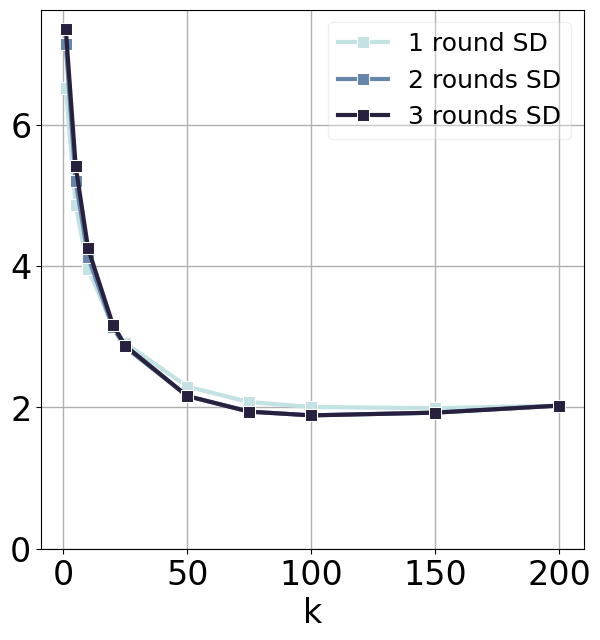

In [6]:
# Plotting
name_dict = {'original': 'No SD',
 'original+': 'No SD',
 '1 round SD-UT': '1 round SD',
 '1 round SD-UT+': '1 round SD',
 '2 rounds SD-UT': '2 rounds SD',
 '2 rounds SD-UT+': '2 rounds SD',
 '3 rounds SD-UT': '3 rounds SD',
 '3 rounds SD-UT+': '3 rounds SD'}
plt.figure(figsize=(7, 7))
palette = sns.color_palette("ch:start=.2,rot=-.3", 9)  # Define a palette with 3 colors
palette_dashed = sns.color_palette("dark:salmon_r", 9)  # Define a palette with 2 colors for dashed lines
color_list = [palette[0],
              palette_dashed[0],
              palette[0],
              palette_dashed[0],
              palette[4],
              palette_dashed[3],
              palette[8],
              palette_dashed[6]]

line_width = 3
marker_size = 8
for i,column in enumerate(df.columns):
    # if i is odd number, continue
    if i % 2 != 0:
        continue
    if i == 0:
        continue
    print(column)
    sns.lineplot(x=df[column]["k"], y=[100* (e - df["original"]["pass@k"][idx]) for idx,e in enumerate(df[column]["pass@k"])], 
                 marker='s', 
                 markersize=marker_size,
                 label=name_dict[column], 
                 color=color_list[i]
                 , linewidth=line_width)

plt.xlabel('k', fontsize=24)
#plt.ylabel('Pass@k', fontsize=24)
plt.legend(
    fontsize=18,
    #title='methods', 
    #title_fontsize='16',
    shadow=False, 
    fancybox=True, 
    loc='upper right', 
    framealpha=0.3,
    #bbox_to_anchor=(1.05, 1) 
)
plt.grid(True, linestyle='-', linewidth=1, alpha=1)
plt.xticks(
    ticks=np.arange(0, 250, 50), 
    fontsize=24)
plt.yticks(
    ticks=np.arange(0, 8, 2), 
    fontsize=24)
plt.savefig('../figs/mbpp_pass_at_k_performance_base.jpg', dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()



In [4]:
work_dir = "/mnt/scratch-artemis/haausing/code_reranking/evalplus_outputs/mbpp"
#gen_dir = "deepseek-coder-7b-instruct-v1.5_temp_0.8_debug1_not_change_positive"
gen_dir = "deepseek-coder-7b-instruct-v1.5_temp_0.8_debug1_sd-ut"

# load eval_results
with open(f"{work_dir}/{gen_dir}/eval_results.json", "r") as f:
    eval_results = json.load(f)
for task_id in eval_results["eval"]:
    eval_results["eval"][task_id] = sorted(eval_results["eval"][task_id], key=lambda x: int(x["solution_id"]))

#pop out ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]
#for task_id in ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]:
#    eval_results["eval"].pop(task_id)

cprint(f"{gen_dir}", "light_blue")
eval_pass_at_k(eval_results, base_only=False, dataset="mbpp")

deepseek-coder-7b-instruct-v1.5_temp_0.8_debug1_sd-ut
mbpp (base tests)
pass@1:	0.763405
pass@5:	0.862334
pass@10:	0.888462
pass@50:	0.923470
pass@100:	0.931922
pass@200:	0.939241
mbpp+ (base + extra tests)
pass@1:	0.659139
pass@5:	0.774163
pass@10:	0.803296
pass@50:	0.844723
pass@100:	0.856630
pass@200:	0.868354


In [35]:
work_dir = "/mnt/scratch-artemis/haausing/code_reranking/evalplus_outputs/mbpp"
gen_dir = "code-llama-7b-instruct_temp_0.2"

# load eval_results
with open(f"{work_dir}/{gen_dir}/eval_results.json", "r") as f:
    eval_results = json.load(f)
for task_id in eval_results["eval"]:
    eval_results["eval"][task_id] = sorted(eval_results["eval"][task_id], key=lambda x: int(x["solution_id"]))

#pop out ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]
for task_id in ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]:
    eval_results["eval"].pop(task_id)

cprint(f"{gen_dir}", "light_blue")
eval_pass_at_k(eval_results, base_only=False, dataset="mbpp")

code-llama-7b-instruct_temp_0.2
mbpp (base tests)
pass@1:	0.546114
pass@5:	0.584168
pass@10:	0.597411
pass@20:	0.607730
pass@25:	0.610226
pass@50:	0.615419
pass@75:	0.617263
pass@100:	0.618324
pass@150:	0.619544
pass@200:	0.620253
mbpp+ (base + extra tests)
pass@1:	0.453506
pass@5:	0.485844
pass@10:	0.496825
pass@20:	0.505388
pass@25:	0.507486
pass@50:	0.512239
pass@75:	0.514345
pass@100:	0.515756
pass@150:	0.517644
pass@200:	0.518987


({'pass@1': 0.546113924050633,
  'pass@5': 0.5841680600242014,
  'pass@10': 0.5974108493533412,
  'pass@20': 0.6077298858975297,
  'pass@25': 0.6102255067692002,
  'pass@50': 0.6154194711728441,
  'pass@75': 0.6172626944884646,
  'pass@100': 0.6183242819107506,
  'pass@150': 0.6195442035855832,
  'pass@200': 0.620253164556962},
 {'pass@1': 0.4535063291139241,
  'pass@5': 0.4858443443799364,
  'pass@10': 0.49682509794409246,
  'pass@20': 0.5053882823088316,
  'pass@25': 0.5074858278386457,
  'pass@50': 0.5122389714499331,
  'pass@75': 0.5143449671320319,
  'pass@100': 0.5157562500765015,
  'pass@150': 0.517643843500532,
  'pass@200': 0.5189873417721519})

In [33]:
work_dir = "/mnt/scratch-artemis/haausing/code_reranking/evalplus_outputs/mbpp"
gen_dir = "code-llama-7b-instruct_temp_0.8"

# load eval_results
with open(f"{work_dir}/{gen_dir}/eval_results.json", "r") as f:
    eval_results = json.load(f)
for task_id in eval_results["eval"]:
    eval_results["eval"][task_id] = sorted(eval_results["eval"][task_id], key=lambda x: int(x["solution_id"]))

#pop out ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]
for task_id in ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]:
    eval_results["eval"].pop(task_id)

cprint(f"{gen_dir}", "light_blue")
eval_pass_at_k(eval_results, base_only=False, dataset="mbpp")

code-llama-7b-instruct_temp_0.8
mbpp (base tests)
pass@1:	0.541848
pass@5:	0.654682
pass@10:	0.690243
pass@20:	0.716608
pass@25:	0.723262
pass@50:	0.739520
pass@75:	0.746828
pass@100:	0.751127
pass@150:	0.755496
pass@200:	0.756962
mbpp+ (base + extra tests)
pass@1:	0.448785
pass@5:	0.549875
pass@10:	0.582668
pass@20:	0.606678
pass@25:	0.612737
pass@50:	0.628783
pass@75:	0.637593
pass@100:	0.643666
pass@150:	0.651395
pass@200:	0.655696


({'pass@1': 0.5418481012658228,
  'pass@5': 0.654681591558583,
  'pass@10': 0.6902426012648786,
  'pass@20': 0.7166078365749753,
  'pass@25': 0.723261617044594,
  'pass@50': 0.7395197979175396,
  'pass@75': 0.7468277129989913,
  'pass@100': 0.7511269741658061,
  'pass@150': 0.7554956391250434,
  'pass@200': 0.7569620253164557},
 {'pass@1': 0.4487848101265823,
  'pass@5': 0.549874585938673,
  'pass@10': 0.5826676421726437,
  'pass@20': 0.6066776519474328,
  'pass@25': 0.6127367484567747,
  'pass@50': 0.628783076797045,
  'pass@75': 0.6375929769910634,
  'pass@100': 0.6436659933866777,
  'pass@150': 0.651395023104091,
  'pass@200': 0.6556962025316456})

In [6]:
work_dir = "/mnt/scratch-artemis/haausing/code_reranking/evalplus_outputs/mbpp"
gen_dir = "code-llama-13b-instruct_temp_0.8_debug1_sd-ut"

# load eval_results
with open(f"{work_dir}/{gen_dir}/eval_results.json", "r") as f:
    eval_results = json.load(f)
for task_id in eval_results["eval"]:
    eval_results["eval"][task_id] = sorted(eval_results["eval"][task_id], key=lambda x: int(x["solution_id"]))

#pop out ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]
#for task_id in ["Mbpp/6", "Mbpp/7", "Mbpp/8", "Mbpp/9"]:
#    eval_results["eval"].pop(task_id)

cprint(f"{gen_dir}", "light_blue")
eval_pass_at_k(eval_results, base_only=False, dataset="mbpp")

code-llama-13b-instruct_temp_0.8_debug1_sd-ut
mbpp (base tests)
pass@1:	0.663633
pass@5:	0.770857
pass@10:	0.799363
pass@50:	0.842066
pass@100:	0.854833
pass@200:	0.868354
mbpp+ (base + extra tests)
pass@1:	0.554785
pass@5:	0.645966
pass@10:	0.672905
pass@50:	0.722668
pass@100:	0.740653
pass@200:	0.756962
